In [1]:
import pandas as pd
from pymongo import MongoClient
import pandas as pd 
import numpy as np
import requests #used for HHTP requests and API calls
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df_train_clean = pd.read_csv("../Resources/cleaned_data.csv")

In [26]:
df_train_clean.head()

,customer_id,month,name,age,occupation,annual_income,num_bank_accounts,num_of_loans,type_of_loans,delay_from_due_date,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,April,Aaron Maashoh,24,Scientist,19114.12,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.46,Low_spent_Small_value_payments,223.45,Good
1,CUS_0xd40,July,Aaron Maashoh,24,Scientist,19114.12,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.54,22 Years and 7 Months,No,49.57,178.34,Low_spent_Small_value_payments,244.57,Good
2,CUS_0x21b1,January,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,24.46,26 Years and 7 Months,No,18.82,104.29,Low_spent_Small_value_payments,470.69,Standard
3,CUS_0x21b1,February,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,7,...,Good,605.03,38.55,26 Years and 8 Months,No,18.82,40.39,High_spent_Large_value_payments,484.59,Good
4,CUS_0x21b1,April,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,39.18,26 Years and 10 Months,No,18.82,99.31,Low_spent_Medium_value_payments,465.68,Good


In [4]:
df_train_clean.occupation.value_counts()

occupation
Lawyer           3412
Architect        3230
Entrepreneur     3220
Engineer         3206
Mechanic         3181
Teacher          3177
Scientist        3163
Media_Manager    3127
Accountant       3113
Doctor           3099
Developer        3093
Manager          2980
Journalist       2927
Writer           2899
Musician         2890
Name: count, dtype: int64

In [5]:
df_train_clean.name.value_counts()

name
Stevex              29
Jessica Wohlt       26
Nate Raymondw       25
Nicko               25
Huwk                25
                    ..
Nayaku               1
Ronaldk              1
Allison Martellz     1
Vlastelican          1
Nicks                1
Name: count, Length: 9162, dtype: int64

In [6]:
mode_occupation = df_train_clean.groupby('name')['occupation'].transform(lambda x: x.mode()[0] 
                                                            if not x.mode().empty 
                                                            else np.nan)
mode_global = df_train_clean["occupation"].mode()[0]

df_train_clean['occupation'] = df_train_clean['occupation'].fillna(mode_occupation.fillna(mode_global))

In [7]:
df_train_clean['occupation']

0        Scientist
1        Scientist
2          Teacher
3          Teacher
4          Teacher
           ...    
50107    Architect
50108    Architect
50109    Architect
50110    Architect
50111     Mechanic
Name: occupation, Length: 50112, dtype: object

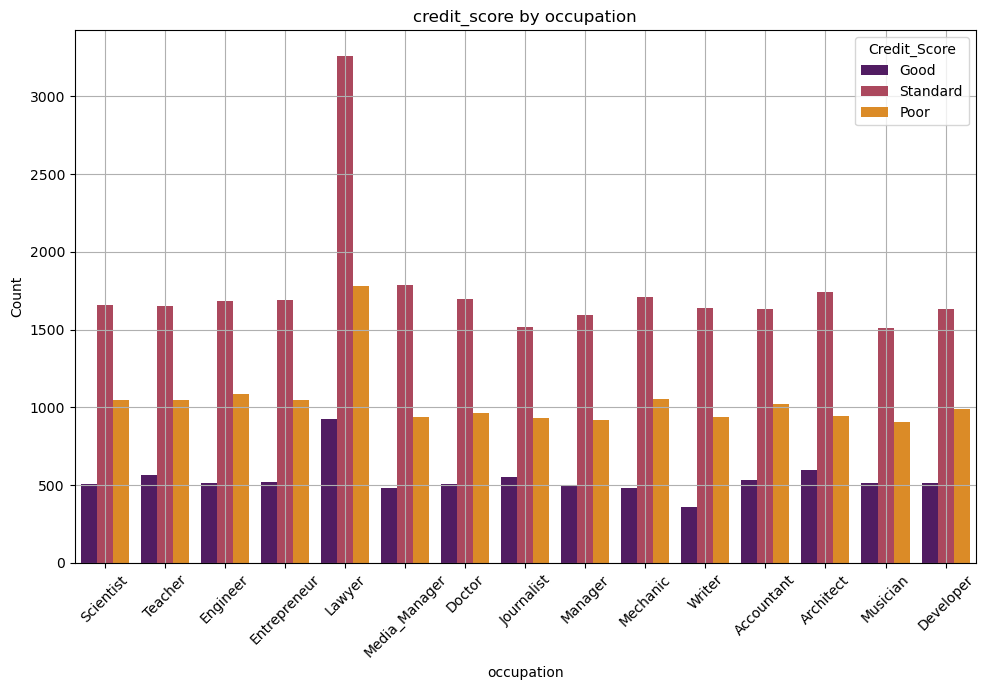

In [8]:
plt.figure(figsize=(10, 7))
sns.countplot(x='occupation', hue='credit_score', data=df_train_clean, palette="inferno")
plt.xlabel('occupation')
plt.ylabel('Count')
plt.title('credit_score by occupation')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
mode_creditage = df_train_clean.groupby('customer_id')['credit_history_age'].transform(
                                                        lambda x: x.mode()[0]
                                                        if not x.mode().empty
                                                        else np.nan)
mode_global = df_train_clean['credit_history_age'].mode()[0]

df_train_clean['credit_history_age'] = df_train_clean['credit_history_age'].fillna(
                                        mode_creditage.fillna(mode_global))

In [10]:
df_train_clean['credit_history_age'].isnull().sum()

0

In [11]:
df_train_clean['credit_history_years'] = df_train_clean['credit_history_age'].str.extract(r'(\d+) Years').astype(int)
df_train_clean['credit_history_months'] = df_train_clean['credit_history_age'].str.extract(r'(\d+) Months').astype(int)

df_train_clean.drop(columns=['credit_history_age'], inplace=True)

In [12]:
df_train_clean['credit_history_age_months'] = df_train_clean['credit_history_years'] * 12 + df_train_clean['credit_history_months']

# Drop the 'Credit_History_Years' and 'Credit_History_Months' columns

df_train_clean.drop(columns=['credit_history_years', 'credit_history_months'], 
        inplace=True)

df_train_clean.head(10)

,customer_id,month,name,age,occupation,annual_income,num_bank_accounts,num_of_loans,type_of_loans,delay_from_due_date,...,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_age_months
0,CUS_0xd40,April,Aaron Maashoh,24,Scientist,19114.12,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.38,No,49.57,199.46,Low_spent_Small_value_payments,223.45,Good,268
1,CUS_0xd40,July,Aaron Maashoh,24,Scientist,19114.12,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.54,No,49.57,178.34,Low_spent_Small_value_payments,244.57,Good,271
2,CUS_0x21b1,January,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,24.46,No,18.82,104.29,Low_spent_Small_value_payments,470.69,Standard,319
3,CUS_0x21b1,February,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,7,...,Good,605.03,38.55,No,18.82,40.39,High_spent_Large_value_payments,484.59,Good,320
4,CUS_0x21b1,April,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,39.18,No,18.82,99.31,Low_spent_Medium_value_payments,465.68,Good,322
5,CUS_0x21b1,May,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,34.98,No,18.82,130.12,Low_spent_Small_value_payments,444.87,Good,323
6,CUS_0x21b1,June,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,33.38,No,18.82,43.48,High_spent_Large_value_payments,481.51,Good,324
7,CUS_0x21b1,July,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,31.13,NM,18.82,70.10,High_spent_Medium_value_payments,464.88,Good,325
8,CUS_0x21b1,August,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,32.93,No,18.82,218.90,Low_spent_Small_value_payments,356.08,Good,326
9,CUS_0x2dbc,February,Langep,35,Engineer,143162.64,1,3,"Auto Loan, Auto Loan, and Not Specified",13,...,Good,1303.01,41.70,No,246.99,232.86,High_spent_Small_value_payments,998.87,Good,214


In [13]:
df_train_clean.select_dtypes(include=['object']).head()

,customer_id,month,name,occupation,type_of_loans,credit_mix,payment_of_min_amount,payment_behaviour,credit_score
0,CUS_0xd40,April,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
1,CUS_0xd40,July,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
2,CUS_0x21b1,January,Rick Rothackerj,Teacher,Credit-Builder Loan,Good,No,Low_spent_Small_value_payments,Standard
3,CUS_0x21b1,February,Rick Rothackerj,Teacher,Credit-Builder Loan,Good,No,High_spent_Large_value_payments,Good
4,CUS_0x21b1,April,Rick Rothackerj,Teacher,Credit-Builder Loan,Good,No,Low_spent_Medium_value_payments,Good


In [14]:
df_train_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
age,50112.0,1.142359e+02,7.093689e+02,-5.000000e+02,25.00,33.000,42.0000,8641.00
annual_income,50112.0,1.722370e+05,1.416031e+06,7.005930e+03,18823.32,36138.855,70088.3600,24198062.00
num_bank_accounts,50112.0,1.704157e+01,1.177375e+02,-1.000000e+00,4.00,6.000,8.0000,1798.00
num_of_loans,50112.0,3.967453e+00,2.213071e+00,1.000000e+00,2.00,4.000,6.0000,9.00
delay_from_due_date,50112.0,2.196855e+01,1.523269e+01,0.000000e+00,10.00,19.000,29.0000,67.00
num_of_delayed_payments,50112.0,3.154941e+01,2.277464e+02,-3.000000e+00,9.00,14.000,19.0000,4397.00
changed_credit_limit,50112.0,1.027291e+01,6.896611e+00,-6.000000e+00,5.00,9.000,15.0000,36.00
num_credit_inquiries,50112.0,2.645913e+01,1.843356e+02,0.000000e+00,3.00,6.000,9.0000,2594.00
outstanding_debt,50112.0,1.506560e+03,1.190213e+03,2.300000e-01,602.02,1237.120,2128.8700,4998.07
credit_utilization_ratio,50112.0,3.220219e+01,5.062133e+00,2.088000e+01,28.01,32.240,36.3900,49.56


In [15]:
df_train_clean.describe(include='object').T

,count,unique,top,freq
customer_id,50112,11062,CUS_0x7341,8
month,50112,8,January,6389
name,50112,9162,Stevex,29
occupation,50112,15,Lawyer,5963
type_of_loans,50112,6249,Not Specified,797
credit_mix,50112,3,Standard,23022
payment_of_min_amount,50112,3,Yes,27907
payment_behaviour,50112,6,Low_spent_Small_value_payments,13780
credit_score,50112,3,Standard,26411


In [16]:
df_train_clean ['payment_behaviour']= df_train_clean['payment_behaviour'].replace("_", " ", regex=True)
df_train_clean

,customer_id,month,name,age,occupation,annual_income,num_bank_accounts,num_of_loans,type_of_loans,delay_from_due_date,...,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,credit_history_age_months
0,CUS_0xd40,April,Aaron Maashoh,24,Scientist,19114.12,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.38,No,49.57,199.46,Low spent Small value payments,223.45,Good,268
1,CUS_0xd40,July,Aaron Maashoh,24,Scientist,19114.12,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.54,No,49.57,178.34,Low spent Small value payments,244.57,Good,271
2,CUS_0x21b1,January,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,24.46,No,18.82,104.29,Low spent Small value payments,470.69,Standard,319
3,CUS_0x21b1,February,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,7,...,Good,605.03,38.55,No,18.82,40.39,High spent Large value payments,484.59,Good,320
4,CUS_0x21b1,April,Rick Rothackerj,28,Teacher,34847.84,2,1,Credit-Builder Loan,3,...,Good,605.03,39.18,No,18.82,99.31,Low spent Medium value payments,465.68,Good,322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50107,CUS_0x8600,January,Sarah McBridec,4975,Architect,20002.88,10,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",35,...,Bad,3571.70,22.90,Yes,60.96,43.37,High spent Large value payments,328.66,Poor,68
50108,CUS_0x8600,February,Sarah McBridec,4975,Architect,20002.88,10,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.70,39.77,Yes,12112.00,148.28,Low spent Small value payments,273.75,Poor,69
50109,CUS_0x8600,March,Sarah McBridec,4975,Architect,20002.88,10,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.70,24.71,Yes,60.96,76.28,Low spent Small value payments,345.74,Poor,70
50110,CUS_0x8600,August,Sarah McBridec,4975,Architect,20002.88,10,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.70,37.14,Yes,60.96,34.66,High spent Large value payments,337.36,Standard,75


In [17]:
df_train_clean.payment_behaviour.value_counts()

payment_behaviour
Low spent Small value payments      13780
High spent Medium value payments     9629
Low spent Medium value payments      7445
High spent Large value payments      7391
High spent Small value payments      6156
Low spent Large value payments       5711
Name: count, dtype: int64

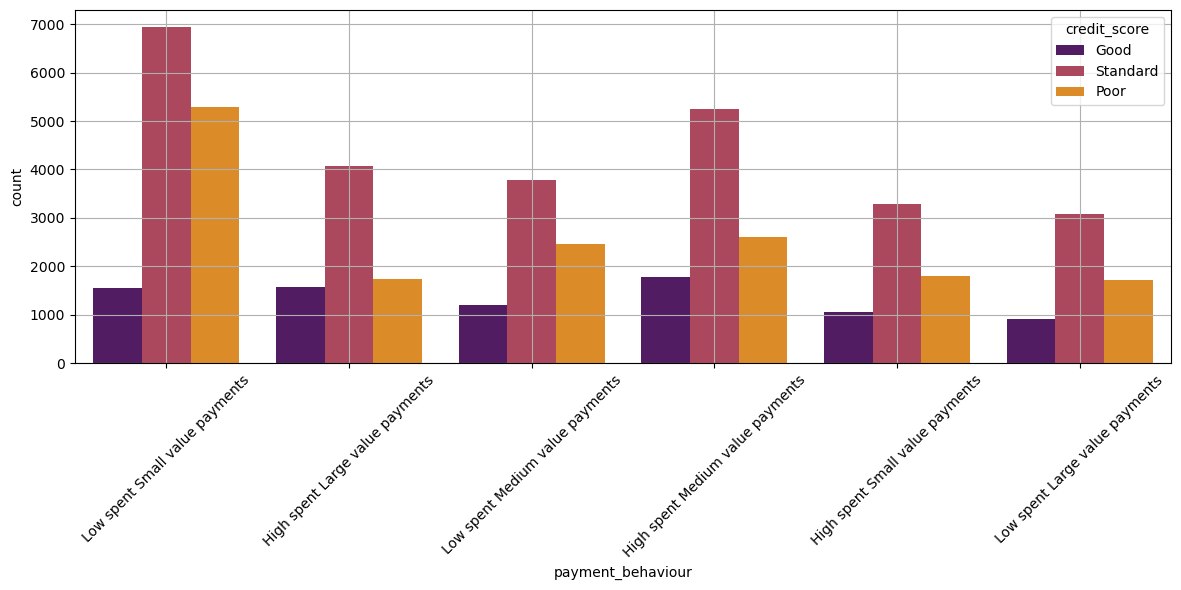

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='payment_behaviour', hue='credit_score', data=df_train_clean, 
              palette="inferno")
plt.xlabel('payment_behaviour')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.legend(title='credit_score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
good_credit =df_train_clean[df_train_clean['credit_score']=="Good"]
top5=good_credit.sort_values('annual_income', ascending = False).head(5)

<Axes: xlabel='annual_income', ylabel='name'>

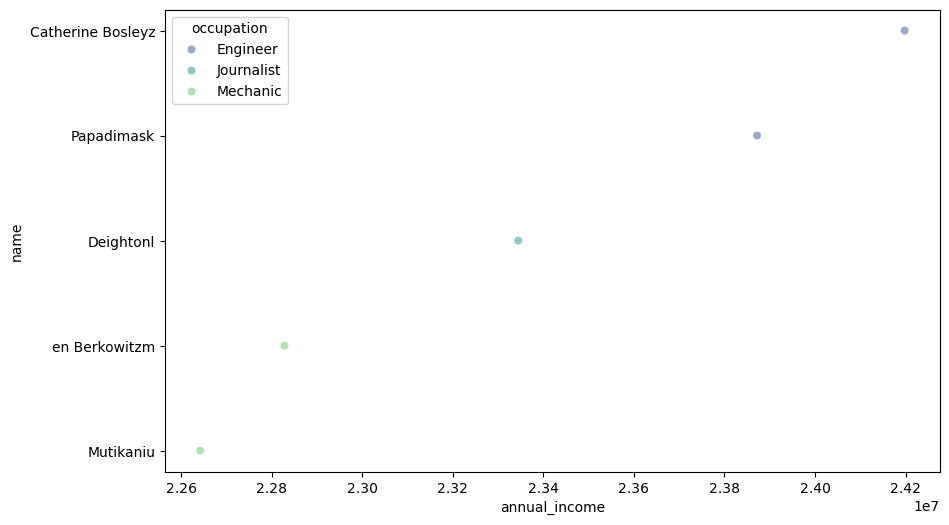

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=top5['annual_income'], y=top5['name'], hue=top5['occupation'], palette='viridis', alpha=0.5)

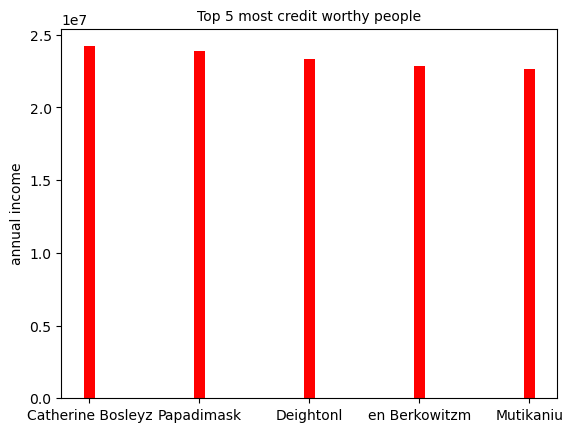

In [21]:
plt.title('Top 5 most credit worthy people', fontsize = 10)
plt.ylabel('annual income')
plt.bar(top5["name"], top5.annual_income, tick_label = top5.name, color = 'red', width = 0.10);

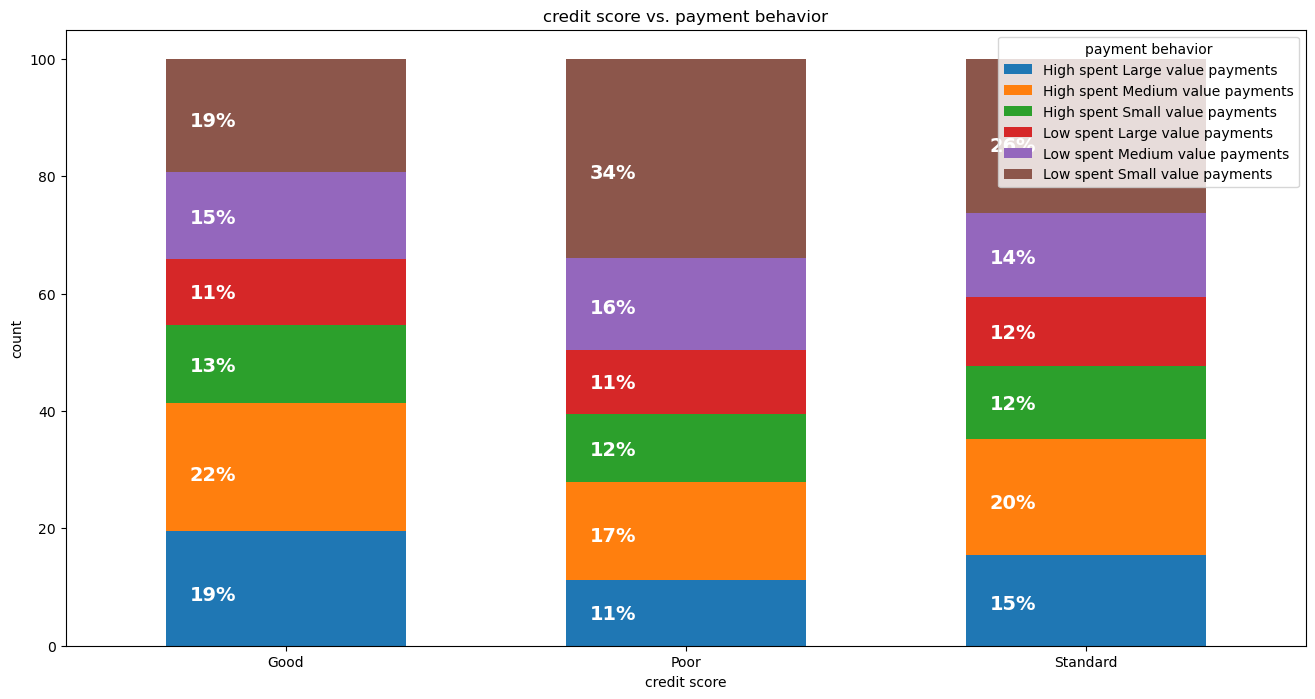

In [22]:
grouped = df_train_clean.groupby(['credit_score', 'payment_behaviour']).size().unstack(fill_value=0)

# Plot the stacked bar chart
ax = (grouped.T * 100.0 / grouped.T.sum()).T.plot(
    kind='bar',
    width=0.6,
    rot=0,
    stacked=True,
    figsize=(16, 8)
)
# Add annotations to the bars
ax.plot()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(
        '{:.0f}%'.format(height),
        (p.get_x() + 0.1 * width, p.get_y() + 0.4 * height),
        color='white',
        weight='bold',
        size=14,
    )
     # Customize the plot
plt.title('credit score vs. payment behavior')
plt.xlabel('credit score')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.legend(title='payment behavior')

plt.show()

In [23]:
df_train_clean.to_csv("Resources\cleaned_credit_score_classification.csv", index = False)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
/var/folders/mt/x6x9jmfj5sl1vdc8fg87zd_80000gp/T/ipykernel_88383/986094190.py:1: SyntaxWarning: invalid escape sequence '\c'
  df_train_clean.to_csv("Resources\cleaned_credit_score_classification.csv", index = False)
